# Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#upload file
df=pd.read_csv('census_income.csv')

In [3]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
df.shape

(32560, 15)

In [5]:
#check datatype of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

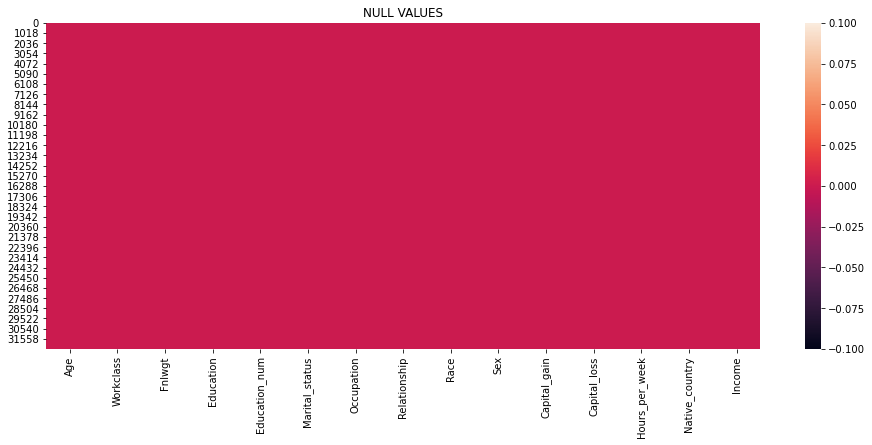

In [7]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

In [8]:
# checking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
#fing unique categories
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [10]:
# display all columns unique values
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+' : ' + str(df[column].unique()))
        print(df[column].value_counts())

Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtyp

from above we can observe dataset not having any null values but in Workclass,  Occupation, Native_country, 
 '?' is present this is missing value, so we will replace this with null values and then we will remove the null values

In [11]:
#replace ' ?' wuith nan
df= df.replace(' ?', np.nan)

In [12]:
# Checking null values in the dataframe
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [13]:
# missing values
feature_null = ['Workclass', 'Occupation', 'Native_country']

In [14]:
# filling null values with mode values
for i in feature_null:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [15]:
#now no null values present
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [16]:
# description of the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

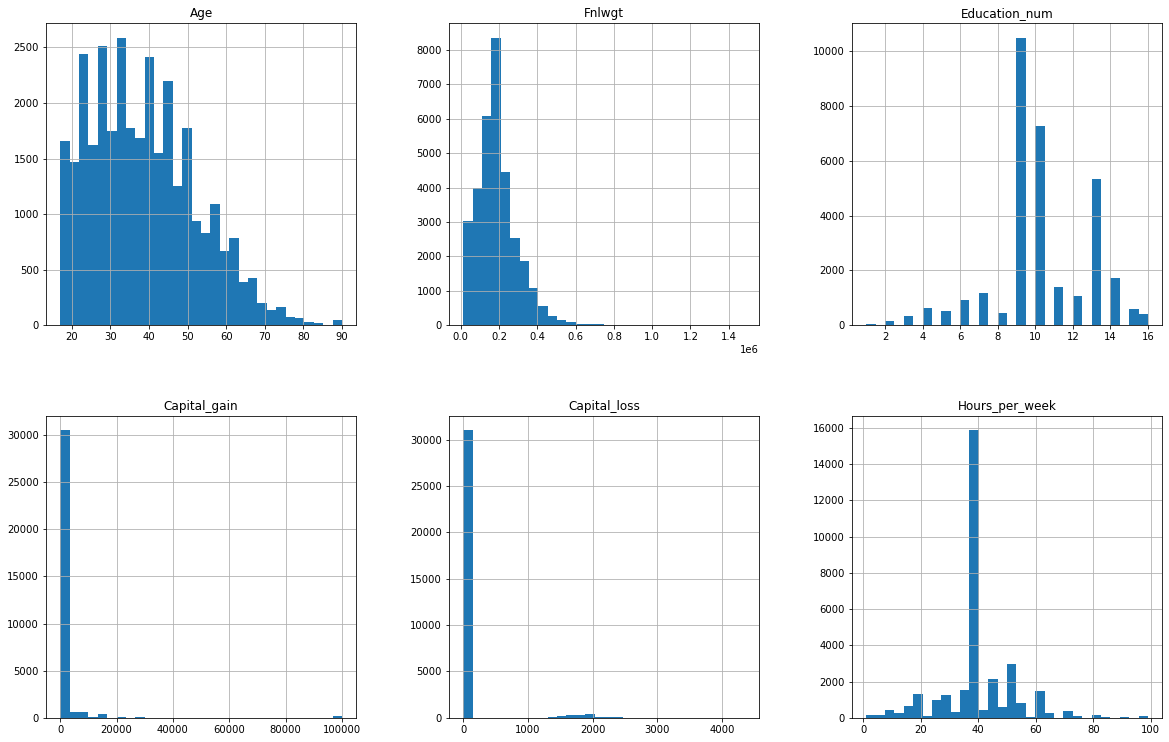

In [17]:
#display histplot
df.hist(figsize=(20,20), grid = True, layout = (3,3), bins = 30)

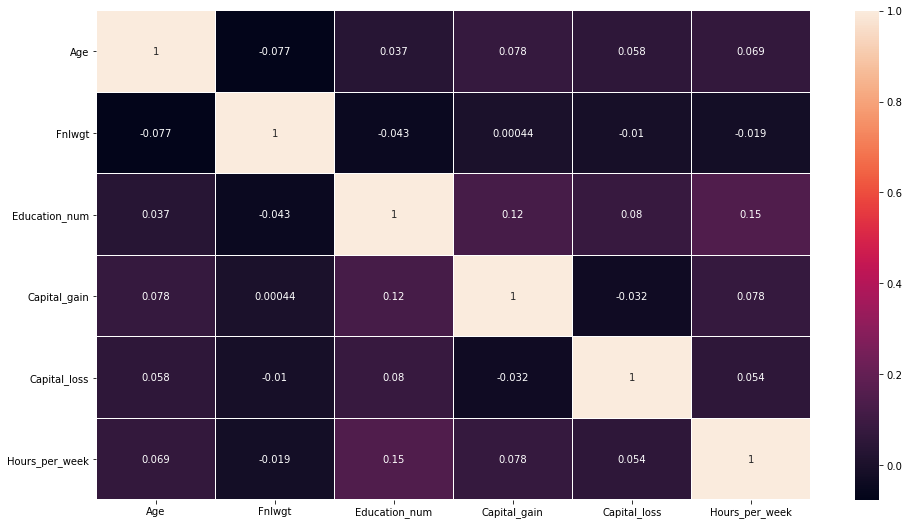

In [18]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

Age                  AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Fnlwgt            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Education_num     AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Capital_gain      AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Capital_loss      AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Hours_per_week    AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
dtype: object

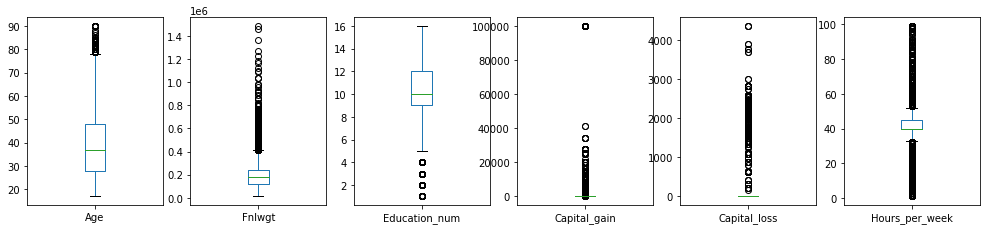

In [19]:
#check outliers with boxplot
df.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20))

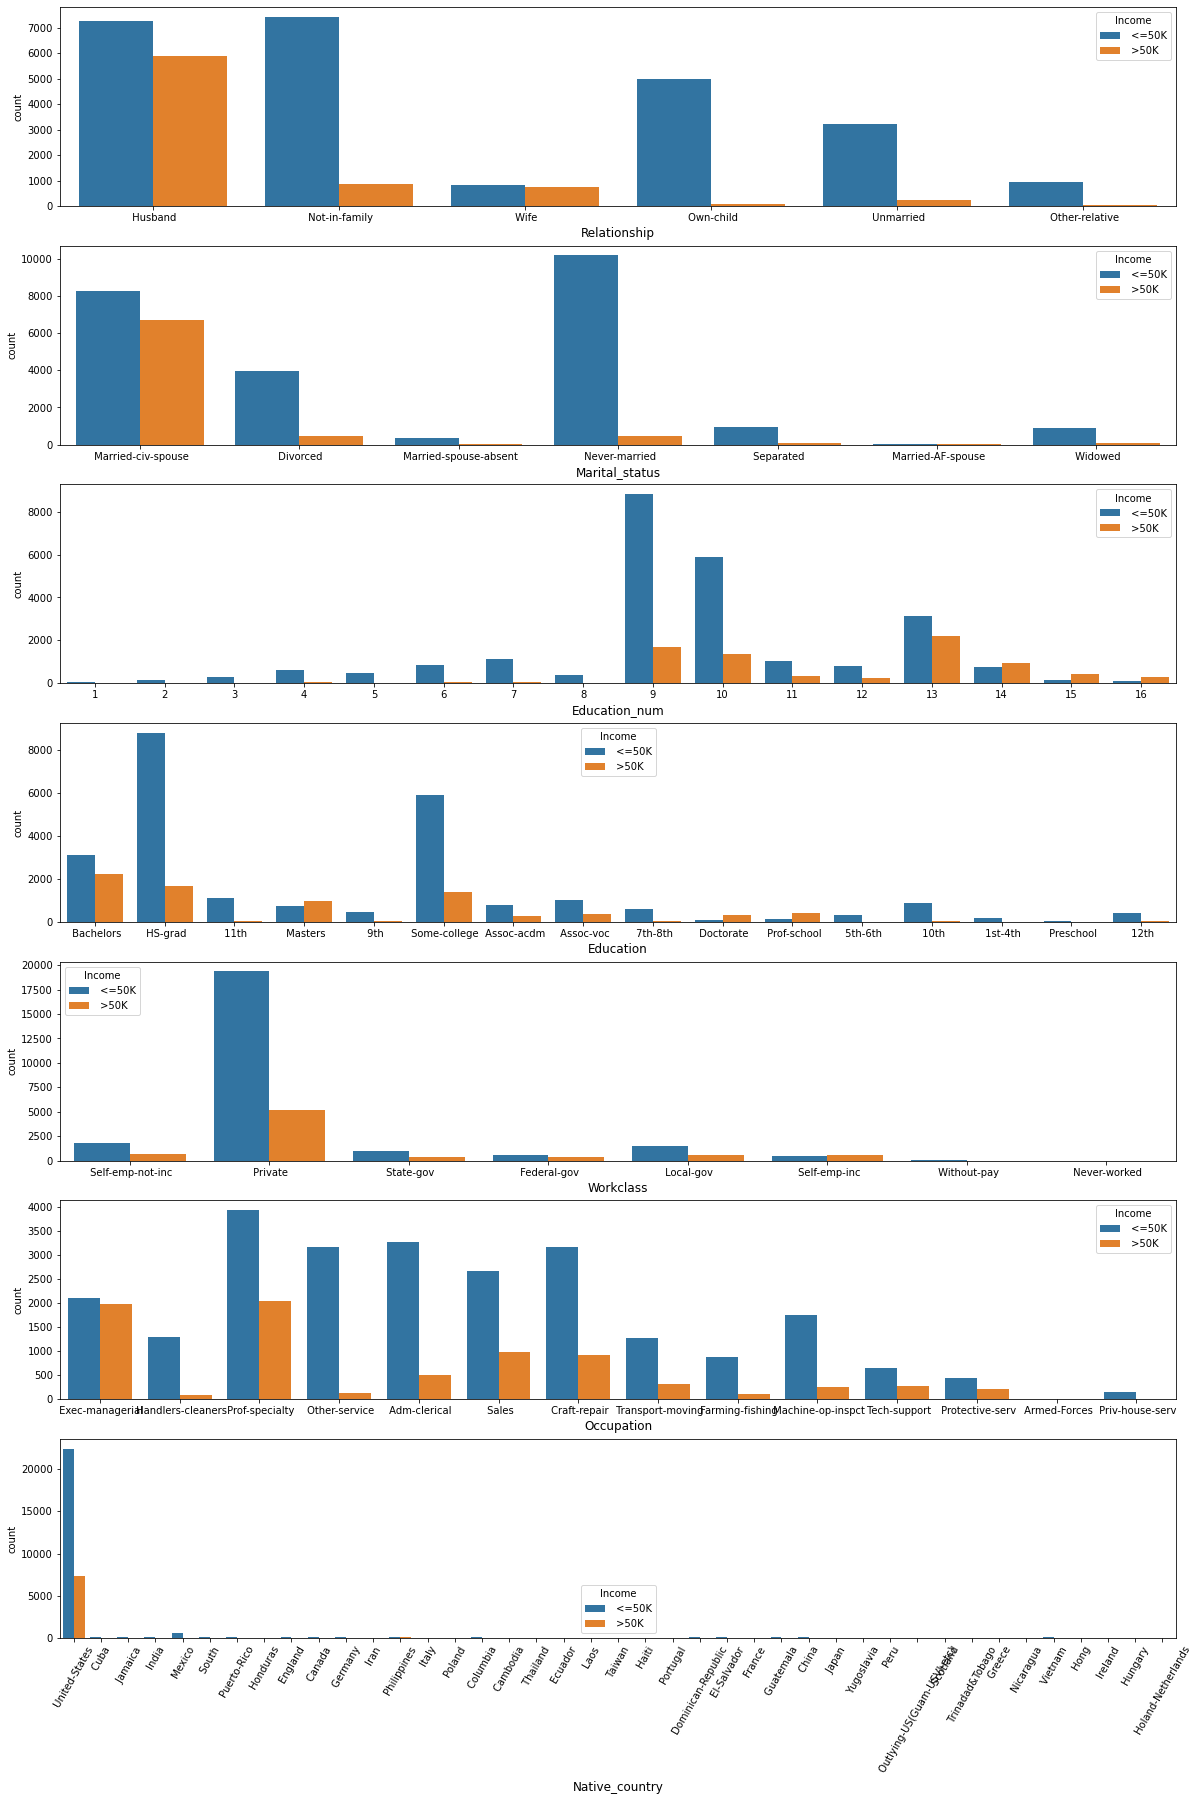

In [20]:
feature=['Relationship','Marital_status','Education_num','Education','Workclass','Occupation','Native_country']
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in df[feature]:
    if plotnumber<=6:
        ax = plt.subplot(7,1,plotnumber)
        sns.countplot(x=column,hue='Income',data=df)
        plt.xlabel(column,fontsize=12)
    if plotnumber==7:
        ax = plt.subplot(7,1,plotnumber)
        sns.countplot(x=column,hue='Income',data=df)
        plt.xlabel(column,fontsize=12)
        plt.xticks(rotation=60)
    plotnumber+=1
plt.show()

from above countplot following are the observations
1. In relationship feature Husband, Not-in-family ,wife, own-child, unmarried, other-relative mpstly having salary less than 50k
2. In Marital_status feature also in all category salary is less than 50k
3. In education_Num feature count more than 9 are having salary more than 50k
4. Education feature only doctorate and Pof-school are having salary more than 50K
5. In workclass feature only self_emp_inc maximum employee are having salary more than 50K, maximum employee 
cunt is in Private category and having very few employee having salary more than 50k
6. In Occupation feature Exec-manager, prof-speciality these 2 category some are having salary more than 50k
remaining othere category in occupation having salry less than 50k
7. in Native country only United state having some employee having salary more than 50K, maxium employee having salary less than 50k


# LabelEncoder: converting categorical to numerical

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [22]:
#categorical columns
feature1=['Workclass','Education','Marital_status','Occupation','Ralationship','Race','Sex','Native_country','Income']

In [23]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [24]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [25]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [26]:
df.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Marital_status'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>,
        <AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

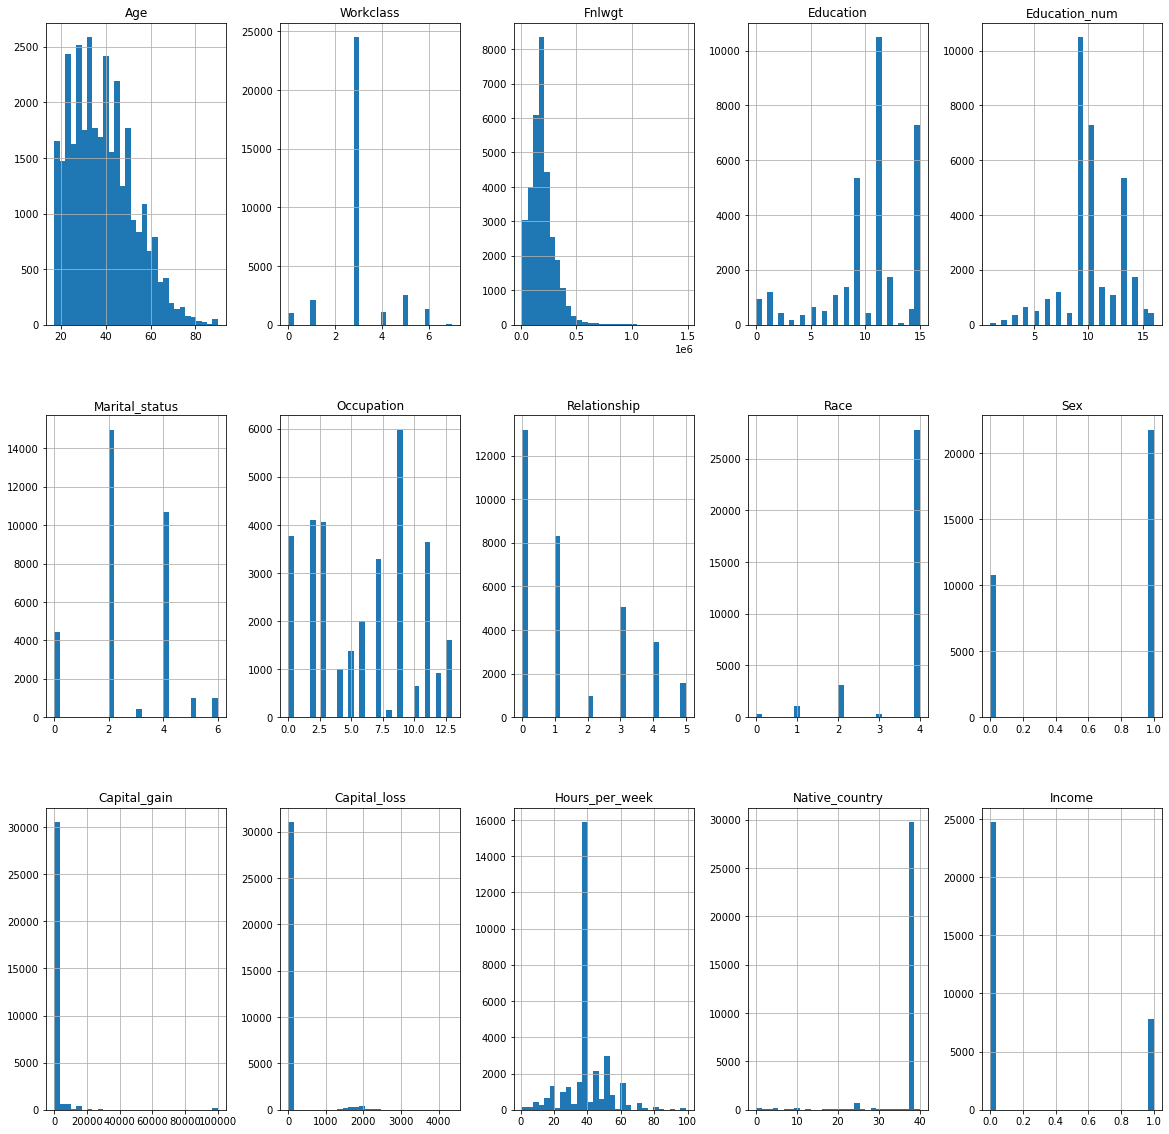

In [27]:
df.hist(figsize=(20,20), grid = True, layout = (3,5), bins = 30)

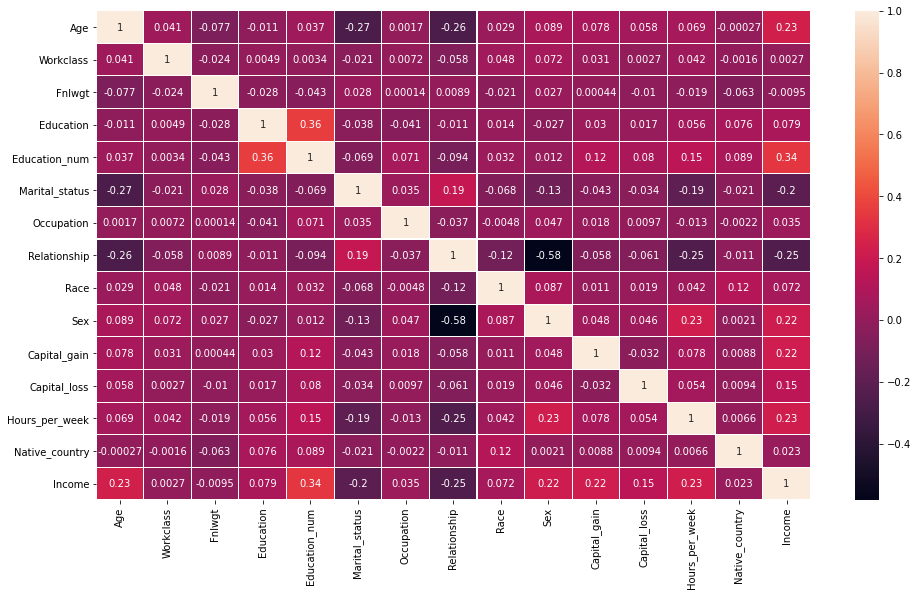

In [28]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

Here we can see with income, Marital Status, Relationship are negatively corelated. Then Age, Education_num, sex, capital_gain, hours_per_week are positively corelated 

Age                  AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Workclass         AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Fnlwgt            AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Education         AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Education_num     AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Marital_status    AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Occupation        AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
Relationship         AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Race              AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Sex               AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Capital_gain      AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Capital_loss      AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
Hours_per_week    AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
Native_country    AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
Income               AxesSubplot(0.125,0.437414;

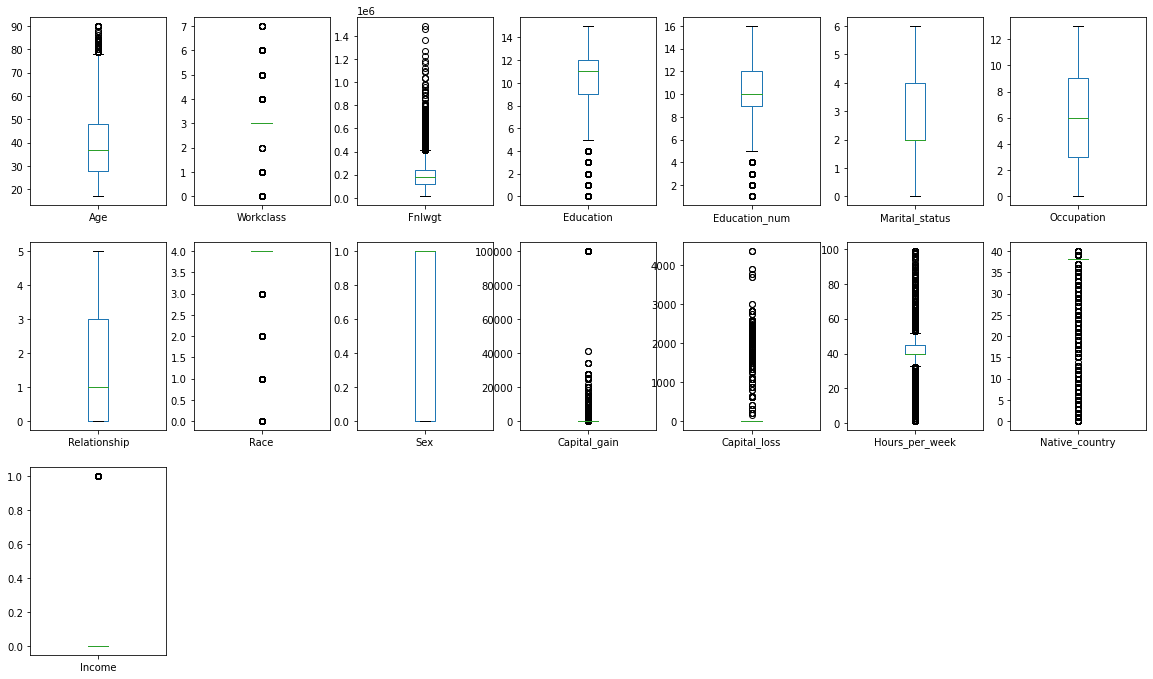

In [29]:
df.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20))

With Boxplot we can see so much of outliers are present

In [30]:
#lets see skewness 
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

# Removing outliers
Capital_gain,Capital_loss,Native_country having to much outlier so we will drop them 
These features we will apply 'Age','Fnlwgt','Education','Relationship','Race','Sex','Capital_gain' zscore

In [31]:
 #df.drop(["Capital_gain","Capital_loss","Native_country"],axis=1,inplace=True)
df.drop(["Capital_gain"],axis=1,inplace=True)

Skewness is present in some features we will try to remove with zscore methode

In [32]:
features=['Age','Fnlwgt','Education','Relationship','Race','Sex']

# Zscore method

In [33]:
# removing outliers by Zscore
from scipy.stats import zscore
z=np.abs(zscore(df[features]))
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,20,38,0


In [34]:
df.shape

(32560, 14)

In [35]:
df_new.shape

(30750, 14)

In [36]:
# Let's check the the data loss
data_loss = (32560-30750)/32560*100
data_loss

5.558968058968059

5.5% data loss which is less than 6%

# IQR method

In [37]:
features1=df[features]
# 1st quantile
Q1=features1.quantile(0.25)
# 3rd quantile
Q3=features1.quantile(0.75)
# IQR
IQR=Q3 - Q1
df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [38]:
#Checking shape of new dataset
df_1.shape

(24547, 14)

In [39]:
# Let's check the the data loss
data_loss = (32560-24547)/32560*100
data_loss

24.60995085995086

24% huge data loss in IQR methode so we will go with Zscore

In [40]:
#still skewness is present will removing skewness using yeo-johnson
df_new.skew()

Age               0.466959
Workclass         0.081062
Fnlwgt            0.624073
Education        -0.936759
Education_num    -0.295858
Marital_status   -0.014564
Occupation        0.005998
Relationship      0.793725
Race             -2.619139
Sex              -0.720689
Capital_loss      4.558029
Hours_per_week    0.229795
Native_country   -4.597678
Income            1.206598
dtype: float64

still skewness is present will removing skewness using yeo-johnson

In [41]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
#Removing skewness using yeo-johnson
df_new[features] = scaler.fit_transform(df_new[features].values)

In [42]:
df_new.skew()

Age              -0.020622
Workclass         0.081062
Fnlwgt           -0.034101
Education        -0.311970
Education_num    -0.295858
Marital_status   -0.014564
Occupation        0.005998
Relationship      0.126310
Race             -2.543100
Sex              -0.720689
Capital_loss      4.558029
Hours_per_week    0.229795
Native_country   -4.597678
Income            1.206598
dtype: float64

Now we can almost skewness is removed,columns in the acceptable range +0.5 or -0.5. 

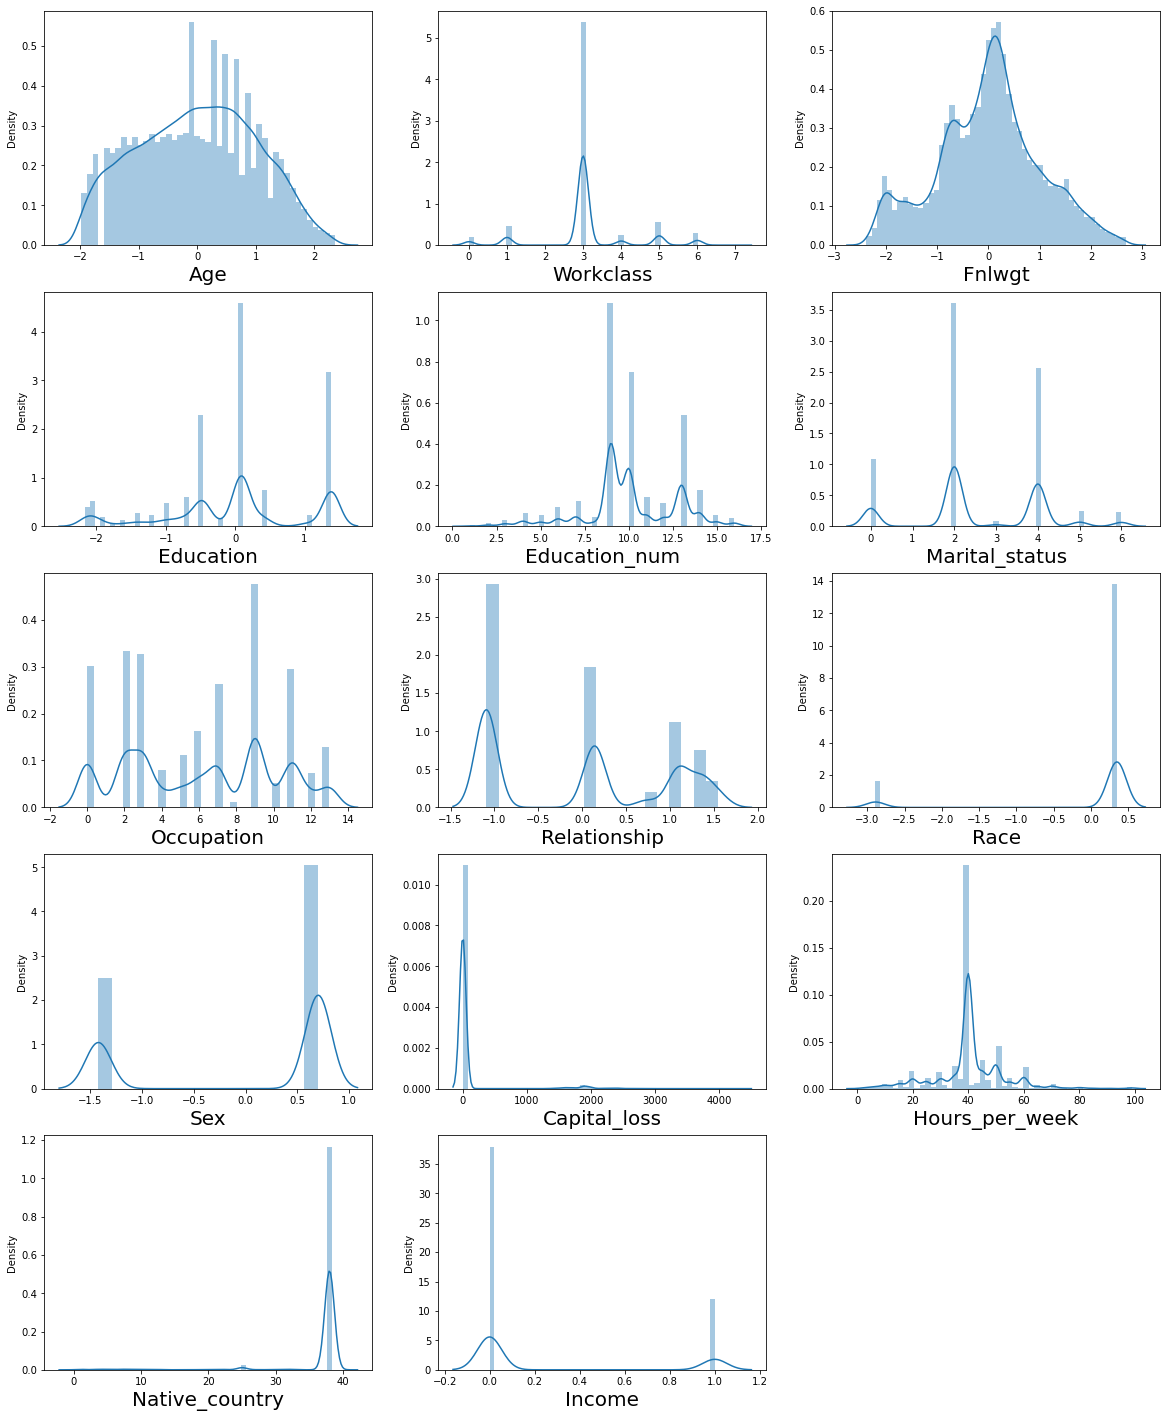

In [44]:
#with distplot we can check skewness 
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new.columns:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [46]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [48]:
df['Native_country'].nunique()

41

# Model Preparation

In [51]:
#separate prediction feature
x = df_new.drop("Income",axis=1)
y = df_new["Income"]

# Standard scaler

In [52]:
#StandardScaler standardizes a feature using standard deviation
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
x = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.259130,Age
1,1.010862,Workclass
2,1.022959,Fnlwgt
3,1.109770,Education
4,1.166537,Education_num
5,1.179661,Marital_status
6,1.014803,Occupation
7,1.944270,Relationship
8,1.047682,Race
9,1.658537,Sex


multicolinearity issue is not present Since all the VIF features is less 

In [54]:
#lets check the value counts of the target variable
y.value_counts()

0    23317
1     7433
Name: Income, dtype: int64

This is a binary-class classification problem. We can see, there is a problem of imbalance. we will go for oversampling

# SMOTE

In [55]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_1,y_1 = SM.fit_resample(x,y)

In [56]:
y_1.value_counts()

1    23317
0    23317
Name: Income, dtype: int64

In [57]:
#importing all the required libraries to find best Algorithm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings("ignore")

In [58]:
#model with DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier
#Import required accuracy metrics for classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

max_accu = 0
max_rs = 0
for i in range(100,200):
    x_train,x_test,y_train,y_test = train_test_split(x_1,y_1,test_size = 0.25, random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8437258770048889 on Random State 195


In [59]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_1,y_1, test_size = 0.25, random_state = max_rs )

# Decision Tree Classifier

In [60]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_dt)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

Accuracy Score: 84.38116476541727%
---------------------------------------------------
Confusion Matrix : 
 [[4851  952]
 [ 869 4987]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      5803
           1       0.84      0.85      0.85      5856

    accuracy                           0.84     11659
   macro avg       0.84      0.84      0.84     11659
weighted avg       0.84      0.84      0.84     11659



# Random Forest Classifier

In [61]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

Accuracy Score: 89.12428167081224%
---------------------------------------------------
Confusion Matrix : 
 [[5071  732]
 [ 536 5320]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      5803
           1       0.88      0.91      0.89      5856

    accuracy                           0.89     11659
   macro avg       0.89      0.89      0.89     11659
weighted avg       0.89      0.89      0.89     11659



# KNNeighbors Classifier

In [62]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_knn)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_knn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_knn)}")

Accuracy Score: 85.37610429710953%
---------------------------------------------------
Confusion Matrix : 
 [[4513 1290]
 [ 415 5441]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.78      0.84      5803
           1       0.81      0.93      0.86      5856

    accuracy                           0.85     11659
   macro avg       0.86      0.85      0.85     11659
weighted avg       0.86      0.85      0.85     11659



# Support Vector Classifier

In [63]:
#model with SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_svc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_svc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_svc)}")

Accuracy Score: 82.81156188352345%
---------------------------------------------------
Confusion Matrix : 
 [[4429 1374]
 [ 630 5226]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      5803
           1       0.79      0.89      0.84      5856

    accuracy                           0.83     11659
   macro avg       0.83      0.83      0.83     11659
weighted avg       0.83      0.83      0.83     11659



# XGBClassifier

In [65]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_xgb)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

[21:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------------------------------------------------
Accuracy Score: 89.69894502101381%
------------------------------------------------------
Confusion Matrix : 
 [[5188  615]
 [ 586 5270]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      5803
           1       0.90      0.90      0.90      5856

    accuracy                           0.90     11659
   macro avg       0.90      0.90      0.90     11659
weighted avg       0.90      0.90      0.90     11659



# ExtraTreesClassifier

In [66]:
#lets check with ExtraTreesClassifier model
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
pred_et = et.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_et)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_et)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_et)}")

-------------------------------------------------------
Accuracy Score: 89.97341109872202%
------------------------------------------------------
Confusion Matrix : 
 [[5093  710]
 [ 459 5397]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      5803
           1       0.88      0.92      0.90      5856

    accuracy                           0.90     11659
   macro avg       0.90      0.90      0.90     11659
weighted avg       0.90      0.90      0.90     11659



# LogisticRegression

In [67]:
#lets check with LogisticRegression model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg = lg.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_lg)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_lg)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_lg)}")

-------------------------------------------------------
Accuracy Score: 77.35654858907282%
------------------------------------------------------
Confusion Matrix : 
 [[4339 1464]
 [1176 4680]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      5803
           1       0.76      0.80      0.78      5856

    accuracy                           0.77     11659
   macro avg       0.77      0.77      0.77     11659
weighted avg       0.77      0.77      0.77     11659



As per the CV Score and Accuracy Score, So as per that , ExtraTreesClassifier,RandomForestClassifier,XGBClassifier Classifier are giving almost same acuracy. So we will do Hyper parameter tuning for 3 models and then will decide which one is  best Model. Now We will try to improve the accuracy of the model through Hyper-parameter tuning.

# Hyper-parameter tuning
ExtraTreesClassifier

In [68]:
params = {'n_estimators':[100,150,200,250,300],
         'max_depth':[10,12,14,16],
         'min_samples_split':[3,4,5,6,7],
         'class_weight':['balanced','balanced_subsample'],
         'n_jobs':[-1,-2,-3,-4],
         }

In [69]:
gcv = GridSearchCV(ExtraTreesClassifier(),params,cv =5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [10, 12, 14, 16],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'n_jobs': [-1, -2, -3, -4]})

In [70]:
gcv.best_params_

{'class_weight': 'balanced',
 'max_depth': 16,
 'min_samples_split': 3,
 'n_estimators': 200,
 'n_jobs': -3}

In [72]:
et = ExtraTreesClassifier(class_weight= 'balanced',max_depth = 16,min_samples_split = 3, n_estimators = 200, n_jobs =-3)
et.fit(x_train,y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=16, min_samples_split=3,
                     n_estimators=200, n_jobs=-3)

In [73]:
#lets check with ExtraTreesClassifier model
pred_et = et.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_et)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_et)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_et)}")

-------------------------------------------------------
Accuracy Score: 85.14452354404322%
------------------------------------------------------
Confusion Matrix : 
 [[4534 1269]
 [ 463 5393]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      5803
           1       0.81      0.92      0.86      5856

    accuracy                           0.85     11659
   macro avg       0.86      0.85      0.85     11659
weighted avg       0.86      0.85      0.85     11659



# Hyper-parameter tuning
RandomForestClassifier

In [74]:
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
pred_rf=model.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

-------------------------------------------------------
Accuracy Score: 86.42250621837208%
------------------------------------------------------
Confusion Matrix : 
 [[4766 1037]
 [ 546 5310]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      5803
           1       0.84      0.91      0.87      5856

    accuracy                           0.86     11659
   macro avg       0.87      0.86      0.86     11659
weighted avg       0.87      0.86      0.86     11659



In [75]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [76]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [77]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 890,
 'criterion': 'gini'}

In [78]:
rf=RandomForestClassifier(n_estimators= 600, min_samples_split= 2,min_samples_leaf= 1,max_features='sqrt', max_depth= 890,criterion= 'gini')
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=890, max_features='sqrt', n_estimators=600)

In [79]:
#lets check with RandomForestClassifier model
pred_rf = rf.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

-------------------------------------------------------
Accuracy Score: 89.2443605798096%
------------------------------------------------------
Confusion Matrix : 
 [[5067  736]
 [ 518 5338]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      5803
           1       0.88      0.91      0.89      5856

    accuracy                           0.89     11659
   macro avg       0.89      0.89      0.89     11659
weighted avg       0.89      0.89      0.89     11659



# Hyper-parameter tuning
XGBClassifier Classifier

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [82]:
# Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [83]:
xgb=xgboost.XGBClassifier()

In [84]:
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [85]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[22:38:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [86]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [87]:
xgb=xgboost.XGBClassifier(min_child_weight= 1,max_depth= 15,learning_rate= 0.2,gamma= 0.4,colsample_bytree= 0.5)
xgb.fit(x_train,y_train)

[22:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
#lets check with XGBClassifier model
pred_xgb = xgb.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_xgb)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

-------------------------------------------------------
Accuracy Score: 89.8876404494382%
------------------------------------------------------
Confusion Matrix : 
 [[5257  546]
 [ 633 5223]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      5803
           1       0.91      0.89      0.90      5856

    accuracy                           0.90     11659
   macro avg       0.90      0.90      0.90     11659
weighted avg       0.90      0.90      0.90     11659



ExtraTreesClassifier,RandomForestClassifier,XGBClassifier Classifier after doing Hyper parameter tuning for 3 model, XGBClassifier is giving best results so we will for this model

# Plot the ROC Curves for comparision

[22:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


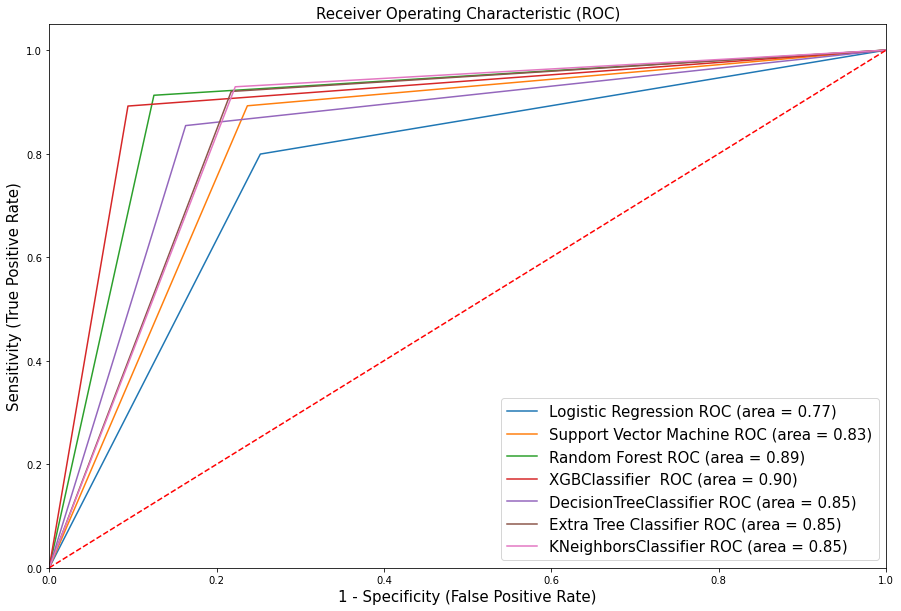

In [89]:
plt.figure(figsize=(15,10))
models = [
{
    'label': 'Logistic Regression',
    'model': lg,
},
{
    'label': 'Support Vector Machine',
    'model': svc,
},
{
    'label': 'Random Forest',
    'model': rf,
},
{
    'label': 'XGBClassifier ', 
    'model': xgb,
},
{
    'label': 'DecisionTreeClassifier',
    'model': dt,
},   
{
    'label': 'Extra Tree Classifier',
    'model': et,
},
{
    'label': 'KNeighborsClassifier',
    'model': knn,
}
]

for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test)
    fpr,tpr,thersholds=roc_curve(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    plt.plot(fpr, tpr,label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=15)

After doing hypertuning of ExtraTreesClassifier, XGBClassifier,RandomForestClassifier.
conclusion:: XGBClassifier giving us best results so we will choose XGBClassifier as best model which is giving 90% accuracy

# Conclusion::Best Model

In [90]:
#model preparation
import pickle
filename='CensusIncome.pkl'
pickle.dump(xgb,open(filename,'wb'))

       Actual  Predict
17196       0        0
40027       1        1
8733        1        0
6526        1        0
46542       1        1
...       ...      ...
19965       0        0
9025        0        0
46273       1        1
21191       1        1
45620       1        1

[11659 rows x 2 columns]


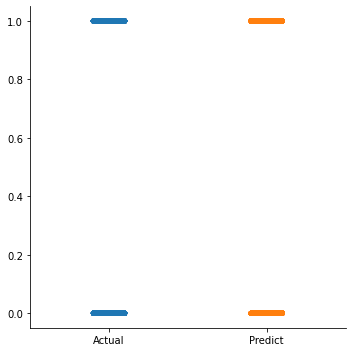

In [91]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=xgb.predict(x_test)

print(res)
sns.catplot(data=res)